#Author:            Gabriel Leffew
#Creation Date:     December 1st, 2020
#Due Date:          December 9th, 2020
#Course:            CSC223
#Professor Name:    Dr. Dylan Schwesinger
#Assignment:        Final Project
#File Name:         main.ipynb
#Purpose:           Present some interesting aspect 
                    of the data using descriptive text
                    and data visualizations.

INTRODUCTION: This dataset is made up of two files. One file named "beers.csv" which contains 2409 Craft Beers with info on all of them. The second file name is "breweries.csv" containing 557 Breweries across the U.S. Each Craft Beer in the list has a 'brewery_id' where it is made. This corresponds to an 'id' for each Brewery in "breweries.csv". Below we answer some questions about the data. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
beers_df = pd.read_csv('beers.csv')
breweries_df = pd.read_csv('breweries.csv')

1. How many craft beers are 12oz, how many are 16oz? What percent of all beers have one of these two sizes?

In [4]:
cnt12 = 0
cnt16 = 0
for beer in beers_df['ounces']:
    if beer == 12.0:
        cnt12 += 1
    elif beer == 16.0:
        cnt16 += 1
cnt_total = cnt12 + cnt16
percentage = (cnt_total/beers_df['row'].max()) * 100
print("12oz: {}".format(cnt12))
print("16oz: {}".format(cnt16))
print("{}%".format(percentage))

12oz: 1525
16oz: 841
98.21502698215026%


ANSWER: There are 1525 craft beers that are made in a 12oz can/bottle, and 841 craft beers that are made in a 16oz can/bottle. In total these two sizes make up 98.22% of the craft beer sample.

2. Are there more craft beers over 6% alcohol by volume, or less than 6%? Name some that are over?

["Devil's Cup", 'Rise of the Phoenix', 'Sinister', 'Sex and Candy', 'Black Exodus', 'Foreman', 'Cone Crusher', 'Sophomoric Saison', 'Regional Ring Of Fire', 'Garce Selé']


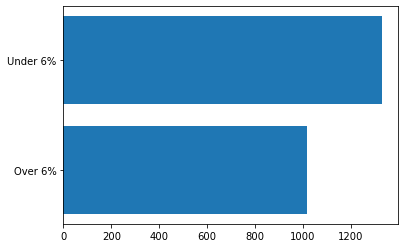

In [5]:
overSix = []
underSix = []
overSix = beers_df['abv'] >= 0.06
underSix = beers_df['abv'] < 0.06
cnt_over = len(beers_df[overSix])
cnt_under = len(beers_df[underSix])
overSix_names = beers_df[overSix]['name'].tolist()
print(overSix_names[:10])
plt.barh([0, 1], [cnt_over, cnt_under])
plt.yticks([0, 1], ['Over 6%', 'Under 6%'])
plt.show()

ANSWER: There are more craft beers under 6% than there are over 6%. Some of the craft beers over 6% include "Devil's Cup", 'Rise of the Phoenix', 'Sinister', 'Sex and Candy', 'Black Exodus', 'Foreman', 'Cone Crusher', 'Sophomoric Saison', 'Regional Ring Of Fire'.

3. Which five breweries makes the most craft beer? Show in a graph.

In [ ]:
ids = beers_df.groupby("brewery_id").count().sort_values(by=['row'], ascending=False)
brewery_id = []
amount = []
for i in range(0, 5):
    brewery_id.append(ids.iloc[i].name)
    amount.append(ids.iloc[i][0])    
brewery_name = []
for i in range(0, 5):
    brewery_name.append(breweries_df[breweries_df['id'].isin(brewery_id)].iloc[i]['name'])
#print(brewery_name, amount)
plt.bar(np.arange(len(brewery_name)), amount)
plt.xticks(np.arange(len(brewery_name)), brewery_name, rotation=90);     

ANSWER: The five breweries that produce the most craft beer are 'Brewery Vivant', 'Sun King Brewing Company', 'Sixpoint Craft Ales', 'Cigar City Brewing Company', 'Oskar Blues Brewery'. We had to find the highest number of beers in the beers_df, using that we were able to look up the breweries name based on the id. This is joining two tables. 

4. Give a list of all the American IPA's made in Pennsylvania.

In [7]:
american = beers_df[beers_df['style'] == 'American IPA']
brewery_id = []
data = []
for i in range(0, len(american)):
    beer_id = american.iloc[i].loc['brewery_id']
    brewery = breweries_df[breweries_df['id'].isin([beer_id])]
    if brewery.iloc[0]['state'] == ' PA':
        beer_name = american.iloc[i].loc['name']
        brewer_name = brewery.iloc[0]['name']
        data.append([beer_name, brewer_name])
for i in data:
    #print("Name: {}\n\tBrewery: {}".format(i[0], i[1]))
    print(i[0])

Mango Ginger
Inclined Plane Ale
Hop Farm IPA
Madra Allta
Duluchan India Pale Ale
Irregardless IPA
Manayunk IPA
Better Half
County Line IPA
Overbite IPA
Jah Mon
Dayman IPA
Old Wylie's IPA
Kiss Off IPA
Homefront IPA
360° India Pale Ale
113 IPA
Perpetual IPA
Good Vibes IPA


ANSWER: The American IPA's made in Pennsylvania are Mango Ginger, Inclined Plane Ale, Hop Farm IPA, Madra Allta, Duluchan India Pale Ale, Irregardless IPA, Manayunk IPA, Better Half, County Line IPA, Overbite IPA, Jah Mon, Dayman IPA, Old Wylie's IPA, Kiss Off IPA, Homefront IPA, 360° India Pale Ale, 113 IPA, Perpetual IPA, and Good Vibes IPA.

5. Which 10 states have the most breweries?

In [8]:
ids = breweries_df.groupby("state").count().sort_values(by=['id'], ascending=False)
#print(ids[:10]['id'])
ids[:10]['id']

state
 CO    47
 CA    39
 MI    32
 OR    29
 TX    28
 PA    25
 WA    23
 MA    23
 IN    22
 WI    20
Name: id, dtype: int64

ANSWER: The top 10 states with the most breweries in descending order are, Colorado at 47, California at 39, Michigan at 32, Oregon at 29, Texas at 28, Pennsylvania at 25, Washington at 23, Massachusetts at 23, Indiana at 22, and Wisconsin at 20.

CONCLUSION: Using Pandas, Numpy, and Matplot we were able to answer questions about the Craft Beer and the Breweries that they were made at. We were able to visualize certain aspects of the data which ultimately allowed us to get a better understanding of the data. 

                                Works Cited
Jean-NicholasHould. “Craft Beers Dataset.” Kaggle, 18 Jan. 2017, www.kaggle.com/nickhould/craft-cans. 